# Numerical Differentiation Lab

In [1]:
import numpy as np
from sympy import *
from autograd import elementwise_grad as egrad
from matplotlib import pyplot as plt

## Problem 1:

symbolic differentialtion of (sin(x) + 1)**sin(cos(x)):
(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))


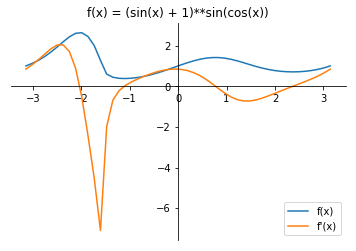

In [2]:
x = symbols('x')
expr = (sin(x) + 1)**sin(cos(x))
d = diff(expr,x)
print("symbolic differentialtion of (sin(x) + 1)**sin(cos(x)):")
print(d)

# Lambdify the symbolic function to compute the values
f = lambdify(x, expr, 'numpy')
g = lambdify(x, d, 'numpy')
# Define the domain
dom = np.linspace(-np.pi, np.pi, 50)
# Plot f(x) and f'(x)
ax = plt.gca()
# making top & right spine invisible
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
# moving bottom and left spine to zero
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
plt.plot(dom, f(dom), label="f(x)")
plt.plot(dom, g(dom), label="f'(x)")
plt.legend(loc='lower right')
plt.title("f(x) = (sin(x) + 1)**sin(cos(x))")
plt.show()

## Problem 2:

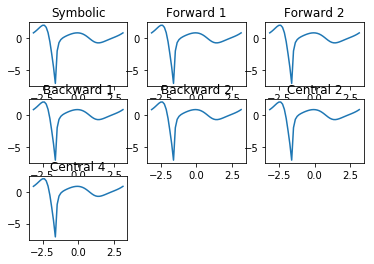

In [3]:
# Define all the functions
def fwd_1(f, x, h):
    f_d = (f(x+h) - f(x))/h
    return f_d
def fwd_2(f, x, h):
    f_d = (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)
    return f_d
def bw_1(f, x, h):
    f_d = (f(x) - f(x-h))/h
    return f_d
def bw_2(f, x, h):
    f_d = (3*f(x) - 4*f(x-h) + f(x-2*h))/(2*h)
    return f_d
def cn_1(f, x, h):
    f_d = (f(x+h) - f(x-h))/(2*h)
    return f_d
def cn_2(f, x, h):
    f_d = (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))/(12*h)
    return f_d
x = np.linspace(-np.pi, np.pi, 50)
h0 = 0.0001

# Calling the functions
f_p1 = fwd_1(f, x, h0)
f_p2 = fwd_2(f, x, h0)
f_p3 = bw_1(f, x, h0)
f_p4 = bw_2(f, x, h0)
f_p5 = cn_1(f, x, h0)
f_p6 = cn_2(f, x, h0)

# plotting the results
plt.subplot(3,3,1)
plt.plot(x, g(x)) # From symbolic
plt.title("Symbolic")
plt.subplot(3,3,2) # Forward 1
plt.plot(x, f_p1)
plt.title("Forward 1")
plt.subplot(3,3,3) # Forward 2
plt.plot(x, f_p2)
plt.title("Forward 2")
plt.subplot(3,3,4) # Backward 1
plt.plot(x, f_p3)
plt.title("Backward 1")
plt.subplot(3,3,5) # Backward 2
plt.plot(x, f_p4)
plt.title("Backward 2")
plt.subplot(3,3,6) # Central 2
plt.plot(x, f_p5)
plt.title("Central 2")
plt.subplot(3,3,7) # Central 4
plt.plot(x, f_p6)
plt.title("Central 4")
plt.show()

## Problem 3:

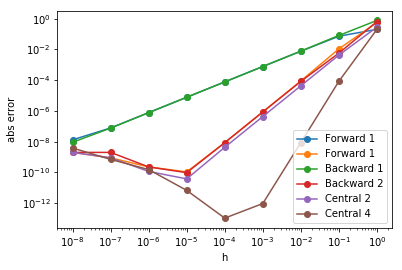

In [4]:
# fix an x0
x0 = 1
# Exact value of the derivative
d = g(x0)
h = np.logspace(-8, 0, 9)
# Approximate value of derivative
d1 = fwd_1(f, x0, h)
d2 = fwd_2(f, x0, h)
d3 = bw_1(f, x0, h)
d4 = bw_2(f, x0, h)
d5 = cn_1(f, x0, h)
d6 = cn_2(f, x0, h)
# computing the absolute errors
err1 = abs(d1 - d)
err2 = abs(d2 - d)
err3 = abs(d3 - d)
err4 = abs(d4 - d)
err5 = abs(d5 - d)
err6 = abs(d6 - d)
# plotting the errors against h
plt.plot(h, err1, '-o', label="Forward 1")
plt.plot(h, err2, '-o', label="Forward 1")
plt.plot(h, err3, '-o', label="Backward 1")
plt.plot(h, err4, '-o', label="Backward 2")
plt.plot(h, err5, '-o', label="Central 2")
plt.plot(h, err6, '-o', label="Central 4")
plt.xlabel("h")
plt.ylabel("abs error")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')
plt.show()

## Problem 5:

In [5]:
def cn_jcbn(f, x, e_i_j, h):
    f_d_p = (f(x + e_i_j*h) - f(x - e_i_j*h))/(2*h)
    return f_d_p

def jacobian(f, x0, h):
    n= len(f)
    m = x0.shape[0]
    # Initiate the Jacobian matrix
    j = np.zeros((n, m))
    for i in range(n):
        for k in range(m):
            std_basis = np.eye(m, 1, -k)
            j[i,k] = cn_jcbn(f[i], x, std_basis, h)
    return j
f_x = [(lambda x: x[0]**2), (lambda x: x[0]**3 - x[1])]
x = np.array([[1],[1]])
h0 = 0.01
j = jacobian(f_x, x, h0)
print(f"Jacobian: {j}")

Jacobian: [[ 2.      0.    ]
 [ 3.0001 -1.    ]]


## Problem 6
### The Chebyshev Polynomials
\begin{equation}
  T_{0}(x) = 1 \qquad T_{1}(x) = x \qquad T_{n}(x) = 2xT_{n-1}(x) - T_{n-2}(x)
\end{equation}

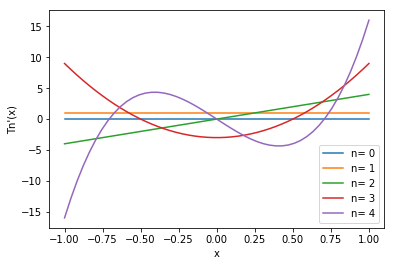

In [6]:
def cheby(x, n):
    if n<2:
        return x**n
    else:
        return (2*x*cheby(x, n-1) - cheby(x, n-2))
# Set the domain
arr_x = np.linspace(-1, 1, 50)
# n in the range 0,1,2,3,4,5
for i in range(5):
    T = cheby(arr_x, i)
    T_ = egrad(cheby)
    plt.plot(arr_x, T_(arr_x, i), label="n= " + str(i))
plt.legend(loc='lower right')
plt.xlabel("x")
plt.ylabel("Tn\'(x)")
plt.show()